In [4]:
import numpy as np
from numpy import linalg as LA
import cv2
# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 150

In [5]:
def CMatrix(N):
    C = np.zeros(shape=(N,N))
    for n in range(N):
        for k in range(N):
            if n == 0:
                c_n = np.sqrt(1/N)
            else:
                c_n = np.sqrt(2/N)
            C[n][k] = c_n * np.cos((2*k+1)*n*np.pi/(2*N))
    return C
    
C = CMatrix(N=4)

In [13]:
np.max(abs(LA.inv(C)-C.T))
# Hier wird gezeigt, dass inv(C) == C'

1.6653345369377348e-16

In [14]:
x = np.array([1, 1, 1, 1])
y = np.dot(C, x.T)
print(y)

[ 2.00000000e+00  5.55111512e-17  0.00000000e+00 -1.11022302e-16]


# 2D DCT
### Falls Bild m*n Matrix

In [8]:
def dct2d(X):
    CL = CMatrix(X.shape[0]) # m
    CR = CMatrix(X.shape[1]) # n
    Y = np.dot(np.dot(CL, X), CR.T)
    return Y

def idct2d(Y):
    CL = CMatrix(Y.shape[0]) # m
    CR = CMatrix(Y.shape[1]) # n
    X = np.dot(np.dot(CL.T, Y), CR)
    return X
    
def compress(Y, thresh):
    Y[abs(Y) < thresh] = 0
    return Y

(<matplotlib.image.AxesImage at 0x10ba782b0>,
 ([], <a list of 0 Text yticklabel objects>),
 ([], <a list of 0 Text xticklabel objects>),
 Text(0.5,1,'Compressed'))

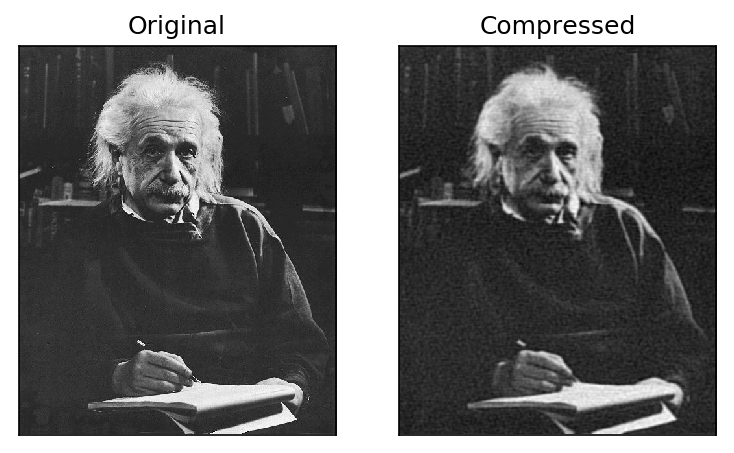

In [16]:
img = cv2.imread("EinsteinLowContrast.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Y = dct2d(img)
Y = compress(Y, 20)
img_compressed = idct2d(Y)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray"), plt.yticks([]), plt.xticks([]), plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(img_compressed, cmap="gray"), plt.yticks([]), plt.xticks([]), plt.title("Compressed")

In [11]:
circle = np.array([
    [0, 0, 1, 1, 1, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 1, 1, 1, 0, 0]
])

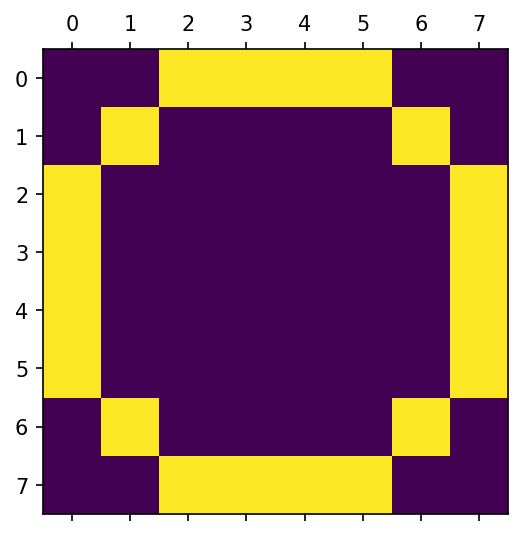

In [12]:
from matplotlib.pyplot import matshow

matshow(circle)

In [13]:
C = CMatrix(N=8)

[[ 2.5         0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         -2.26776695  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]


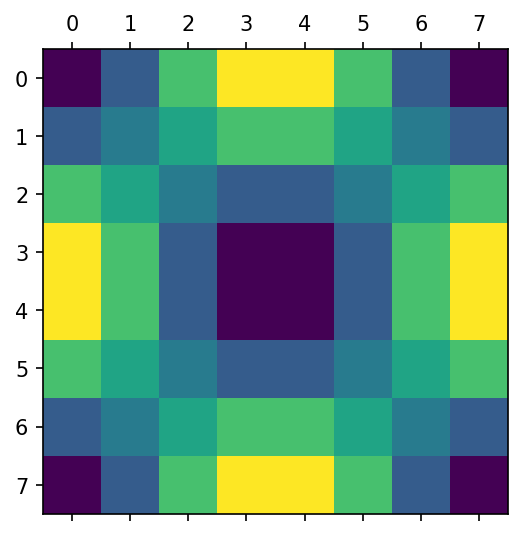

In [25]:
Y = dct2d(circle)
Y = compress(Y, 2.2)
print(Y)
matshow(idct2d(Y))

[[ 2.5         0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         -2.26776695  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]


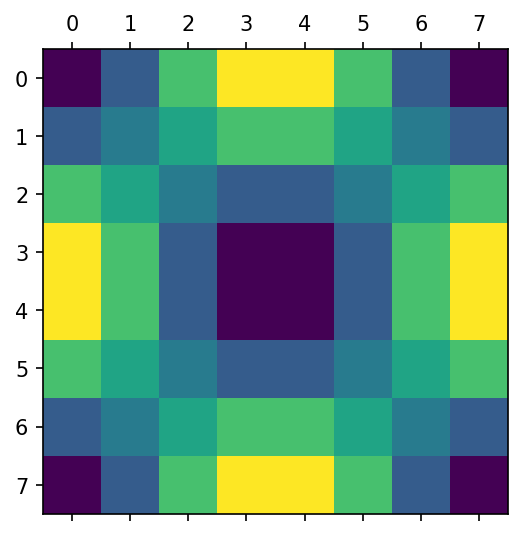

In [26]:
Y = dct2d(circle)
Y = compress(Y, 1.5)
print(Y)
matshow(idct2d(Y))

[[ 2.5         0.          0.65328148  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.65328148  0.         -2.26776695  0.         -1.19447758  0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         -1.19447758  0.          0.5         0.
   1.03596491  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          1.03596491  0.
   1.26776695  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]


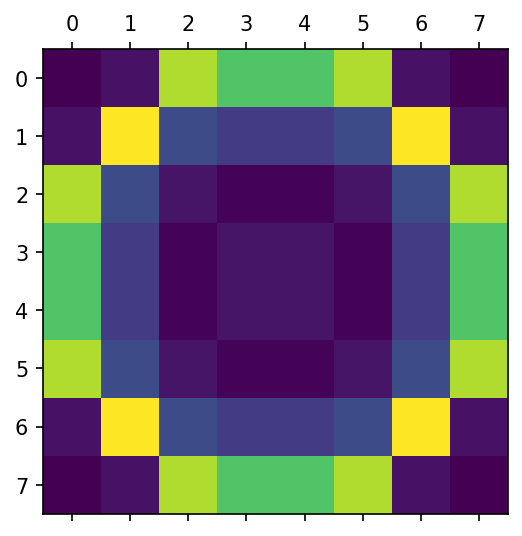

In [24]:
Y = dct2d(circle)
Y = compress(Y, 0.5)
print(Y)
matshow(idct2d(Y))

In [35]:
import cv2
from matplotlib import pyplot as plt

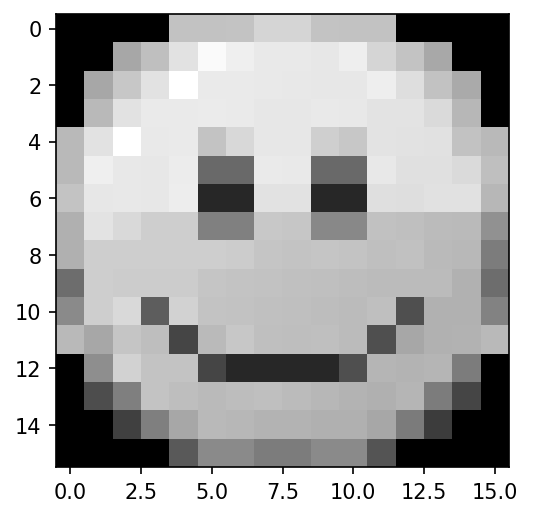

In [34]:
img = cv2.cvtColor(cv2.imread('icon.png'), cv2.COLOR_BGR2GRAY) 
plt.imshow(img, cmap="gray")

In [40]:
img

array([[  0,   0,   0,   0, 180, 180, 182, 198, 198, 182, 180, 180,   0,
          0,   0,   0],
       [  0,   0, 155, 177, 210, 232, 222, 216, 216, 214, 221, 198, 182,
        156,   0,   0],
       [  0, 155, 185, 210, 237, 217, 217, 216, 215, 214, 214, 221, 206,
        180, 158,   0],
       [  0, 172, 210, 217, 217, 218, 217, 214, 214, 216, 215, 212, 211,
        202, 170,   0],
       [172, 210, 237, 216, 217, 182, 200, 214, 214, 192, 185, 211, 210,
        209, 180, 172],
       [172, 222, 215, 214, 219,  98,  98, 217, 216,  98,  98, 215, 208,
        208, 202, 177],
       [181, 214, 215, 214, 220,  37,  37, 210, 210,  37,  37, 207, 206,
        209, 209, 170],
       [163, 212, 201, 191, 191, 119, 119, 186, 184, 126, 126, 179, 177,
        174, 173, 135],
       [163, 191, 191, 191, 191, 191, 189, 183, 182, 183, 182, 177, 179,
        173, 171, 115],
       [101, 191, 189, 189, 189, 183, 182, 180, 178, 177, 175, 174, 174,
        174, 164, 101],
       [128, 191, 201,  87, 19

In [44]:
Y = dct2d(img)
Y = compress(Y, 40)
img_compressed = idct2d(Y)
img_compressed

array([[  4.46851693,  18.68925738,  -2.33705125,  18.81351015,
        153.81772141, 191.93037971, 183.7228615 , 202.7303447 ,
        201.71329255, 180.71078979, 187.03904066, 147.23508645,
         10.79254625, -11.48810296,   8.75978766,  -5.85778686],
       [ -7.37730751,  24.07538766, 145.23936762, 189.61911218,
        225.41818666, 234.84082791, 238.41328821, 204.38876993,
        203.37171778, 235.4012165 , 229.94948886, 218.8355517 ,
        181.59814827, 136.08831592,  14.14591794, -17.7036113 ],
       [  8.40881662, 166.42318774, 193.6278644 , 210.86839672,
        229.18773717, 225.55231971, 197.38785192, 225.96061934,
        224.94356719, 194.3757802 , 220.66098067, 222.60510221,
        202.84743281, 184.47681269, 156.49371802,  -1.91748717],
       [ -4.74534835, 162.71565599, 213.37278945, 211.3222949 ,
        228.8969526 , 214.23324114, 207.45979728, 208.51848827,
        207.50143612, 204.44772557, 209.3419021 , 222.31431764,
        203.301331  , 204.22173774, 1

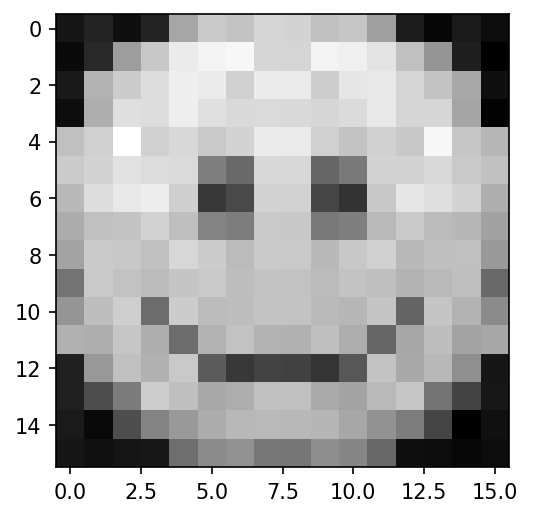

In [45]:
plt.imshow(img_compressed, cmap="gray")